# **Bioinformatics Project - Computational Drug Discovery [Part 4] Regression Models with Random Forest**

In **Part 4**, we will be building a regression model of BCR::ABL1 compounds/inhibitors using the random forest algorithm.

---

## **1. Import libraries**

In [ ]:
# Install scikit if needed with %pip install scikit-learn
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 4.8 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


## **2. Load the data set**

In [6]:
df = pd.read_csv('bioactivity_data_preprocessed_pIC50_3class_pubchem_fp_BCR-ABL1.csv')

## **3. Input features**
The ***BCR::ABL1*** data set contains 328 input features and 1 output variable (pIC50 values). Each molecule/compound is given a unique fingerprint. The machine learning algorithm will use this to learn on.

### **3.1. Input features**

In [7]:
X = df.drop('pIC50', axis=1) # this drops the column with the pIC50 values to create the X matrix which is only the PubChem fingerprints
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
324,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
325,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
326,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### **3.2. Output features**

In [10]:
Y = df.pIC50 # This sets the Y matrix to the pIC50 values
Y

0      7.698970
1      8.698970
2      8.522879
3      9.000000
4      9.000000
         ...   
323    7.356547
324    7.327902
325    9.000000
326    9.000000
327    5.659159
Name: pIC50, Length: 328, dtype: float64

### **3.3. Let's examine the data dimension**

In [11]:
X.shape

(328, 881)

We see there are 328 compounds and 881 PubChem fingerprint features.

In [12]:
Y.shape

(328,)

### **3.4. Remove low variance features**

In [13]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [15]:
X.shape

(328, 95)

We went from 881 to 95 PubChem signatures in this scenario after removing low variance

## **4. Data split (80/20 ratio)**

Here we will split our data to train on 80% of it and test on 20% of it.

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [17]:
X_train.shape, Y_train.shape

((262, 95), (262,))

In [18]:
X_test.shape, Y_test.shape

((66, 95), (66,))

## **5. Building a Regression Model using Random Forest**

In [29]:
import numpy as np
np.random.seed(100) # This sets the seed for the random number generator so that the results are reproducible.

model = RandomForestRegressor(n_estimators=100) # This creates the random forest model with 100 trees.
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test) #The r2 score is the coefficient of determination, a measure of how well the model is doing. It ranges from 0 to 1. 1 means the model is perfect. 0 means the model is no better than just guessing the mean value of the target variable.
r2

0.41061688674140695

In [30]:
Y_pred = model.predict(X_test)

## **6. Scatter Plot of Experimental vs Predicted pIC50 Values**

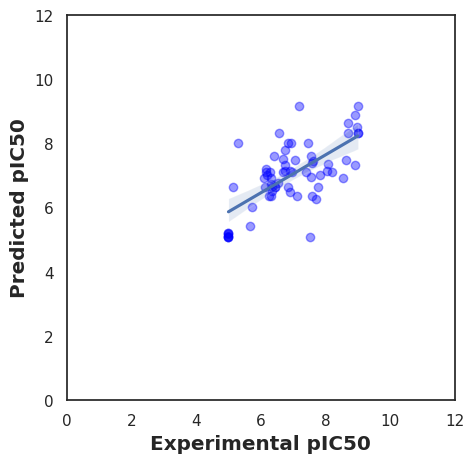

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4, 'color': 'blue'})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)

# Show the plot 
plt.show()



In [42]:
# Save the plot as a pdf
ax.figure.savefig('plot_Predicted_pIC50_vs_Experimental_pIC50.pdf')